In [3]:
# https://blog.floydhub.com/spinning-up-with-deep-reinforcement-learning/
import gym
import random
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [4]:
# Collect a game of Pong with random input.
frames = []
frames_ram = []
STEPS = 300

UP_ACTION = 2
DOWN_ACTION = 3

env = gym.make("Pong-ram-v0")

observation = env.reset()

for i in range(STEPS):
    gym.envs.registry
    action = random.randint(UP_ACTION, DOWN_ACTION)

    observation, reward, done, info = env.step(action)
    frames.append(env.unwrapped._get_image())
    frames_ram.append(env.unwrapped._get_ram())
    
    if done:
        observation = env.reset()
        frames.append(observation)

[192   0   0   0 110  38   0   7 129   2   0   0 192   0   0  63 255   4
   1   3   0 142   0  24 128  32   1  86 247  86 247  86 247 134 243 245
 243 240 240 242 242  32  32  64  64  64 188  65 189 116 142 152  37  37
 142   0   0   0   1 109 152  37  37 192 192 192 192 192 192 202 247 202
 247 202 247 202 247   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 180  85  54 236 242
 121 240]
Player position y: 152
Ball position x: 116
Ball position y: 142


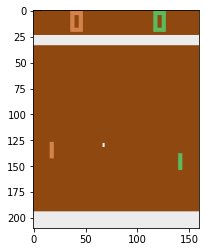

KeyboardInterrupt: 

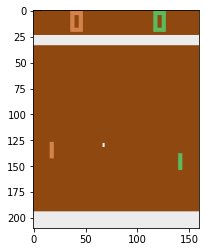

In [24]:
# Draw our frames to see what happened and print ram to find important addresses.
ram_address_position_player_y = 60
ram_address_position_ball_x = 49
ram_address_position_ball_y = 50

for i in range(len(frames)):
    plt.imshow(frames[i])
    print(frames_ram[i])
    print('Player position y: ' + str(frames_ram[i][ram_address_position_player_y]))
    print('Ball position x: ' + str(frames_ram[i][ram_address_position_ball_x]))
    print('Ball position y: ' + str(frames_ram[i][ram_address_position_ball_y]))
    display.display(pl.gcf())
    time.sleep(0.5)
    display.clear_output(wait=True)
    


In [ ]:
# Create the neural network.
# Idea 1: TODO: We will enter the balls and player position.
# Idea 2: TODO: We will add the previous positions also in the network and see what happens.
# TODO: What is a adam optimizer?
model = Sequential()
model.add(Dense(units=200,input_dim=80*80, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='RandomNormal'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])